<a href="https://colab.research.google.com/github/BenjaminAbabio/Group/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this project analysis is to identify the spatial distribution of primary health care centers in associated with health workers and population in each local government in Lagos State in Nigeria.
More accurately, the project focuses on determining the following;


*   The number of health workers in each local government area and its population.  
*   Assess the population served by primary health care centers in each local government.


*   The population per health workers in each local government both as a whole and by categories. 






* Map the spatial distribution of primary health care centers in each local government.[link text](https:// [link text](https:// [link text](https://)))






In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt



In [ ]:
pip install geopandas

In [ ]:

!pip install plotly



In [ ]:
pip install ipyleaflet

In [ ]:
import numpy as np
import plotly as py
import pandas as pd
import geopandas as gpd
import plotly.tools as tls
import json
from ipyleaflet import GeoJSON, Marker, MarkerCluster, Popup
from ipywidgets import HTML
%matplotlib inline
import matplotlib.pyplot as plt
plt.show()
import plotly.express as px
import ipyleaflet
from ipyleaflet import Map, GeoJSON
import json



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DATA PREPARATION

Importing and merging of data source





In [ ]:
df = pd.read_csv("/content/drive/MyDrive/medics.csv") # df is the medical data for health providers by the local goverment in lagos state.
dfh = pd.read_csv("/content/drive/MyDrive/hospital_facilities.csv") # dfh is the data of location of hospital facilities in sub-sahara Africa.
dfb = gpd.read_file("/content/drive/MyDrive/Lagos2/lagos.shp") # dfb is the boundary data of all the local goverment in lagos state.
pp = pd.read_csv("/content/drive/MyDrive/population.csv") # population data for each local govement in lagos state.

In [ ]:
df.head()

,LGA,COMMUNIT Y/ WARDS,NOS. OF PHC,NOS. OF BEDS,NOS. OF INCUBATORS,NO. OF CRADLES,NO. OF COTS,DOCTORS,NURSES,other Health Workers
0,Agege,13,6,60,0,0,0,7,38,70
1,Ajeromi-Ifelodun,7,7,40,0,0,0,9,24,69
2,Alimosho,36,33,141,2,0,1,26,65,89
3,Amuwo-Odofin,4,36,113,1,0,1,12,58,113
4,Apapa,8,8,63,0,1,1,8,17,42


In [ ]:
pp.head()

,lgas,population
0,Agege,617548
1,Ajeromi-Ifelodun,918530
2,Alimosho,1715554
3,Amuwo-Odofin,427193
4,Apapa,291846


In [ ]:
dfh.head()

,Country,Admin1,Facility name,Facility type,Ownership,Lat,Long,LL source
0,Nigeria,Lagos,Abaranje Primary Health Centre,Primary Health Centre,NaN,6.5294,3.2419,Google Earth
1,Nigeria,Lagos,Aboreji Health Post,Health Post,NaN,6.3822,4.3076,GPS
2,Nigeria,Lagos,Aboru Primary Health Centre,Primary Health Centre,NaN,6.6197,3.2825,Google Earth
3,Nigeria,Lagos,Above Medical Centre,Hospital,NaN,6.5425,3.2611,Combination
4,Nigeria,Lagos,Abule Nla Primary Health Centre,Primary Health Centre,NaN,6.5247,3.3863,Other


The original data for the hospital facilities was groupby and sorted to acquire all hospital facilities in Lagos state in each local government and primary health care facilities whic was our main focus target was filtered out to perform further analysis.







In [ ]:
dfh.groupby(["Admin1"]).mean().sort="facility_type" #grouping of primary health centers 
dfh.head()

,Country,Admin1,Facility name,Facility type,Ownership,Lat,Long,LL source
0,Nigeria,Lagos,Abaranje Primary Health Centre,Primary Health Centre,NaN,6.5294,3.2419,Google Earth
1,Nigeria,Lagos,Aboreji Health Post,Health Post,NaN,6.3822,4.3076,GPS
2,Nigeria,Lagos,Aboru Primary Health Centre,Primary Health Centre,NaN,6.6197,3.2825,Google Earth
3,Nigeria,Lagos,Above Medical Centre,Hospital,NaN,6.5425,3.2611,Combination
4,Nigeria,Lagos,Abule Nla Primary Health Centre,Primary Health Centre,NaN,6.5247,3.3863,Other


In [ ]:
dfh.loc[dfh['Facility type']=="Primary Health Centre"]
phc = dfh.loc[dfh['Facility type']=="Primary Health Centre"] # phc is the sorting of all primary health centers in lagos per local government


In [ ]:
phc.head()

,Country,Admin1,Facility name,Facility type,Ownership,Lat,Long,LL source
0,Nigeria,Lagos,Abaranje Primary Health Centre,Primary Health Centre,NaN,6.5294,3.2419,Google Earth
2,Nigeria,Lagos,Aboru Primary Health Centre,Primary Health Centre,NaN,6.6197,3.2825,Google Earth
4,Nigeria,Lagos,Abule Nla Primary Health Centre,Primary Health Centre,NaN,6.5247,3.3863,Other
5,Nigeria,Lagos,Abule Titun Primary Health Centre,Primary Health Centre,NaN,6.6850,3.2777,GPS
6,Nigeria,Lagos,Adeniji Adele Primary Health Centre,Primary Health Centre,NaN,6.4634,3.3926,GPS


In [ ]:
df.head()

,LGA,COMMUNIT Y/ WARDS,NOS. OF PHC,NOS. OF BEDS,NOS. OF INCUBATORS,NO. OF CRADLES,NO. OF COTS,DOCTORS,NURSES,other Health Workers
0,Agege,13,6,60,0,0,0,7,38,70
1,Ajeromi-Ifelodun,7,7,40,0,0,0,9,24,69
2,Alimosho,36,33,141,2,0,1,26,65,89
3,Amuwo-Odofin,4,36,113,1,0,1,12,58,113
4,Apapa,8,8,63,0,1,1,8,17,42


Columns that were not neccessary for your project was drop from the data while we also add some additional columns to the data set for significant purpose.

In [ ]:
df.drop(df.columns[[4,5,6]], axis=1)
df2 = df.drop(df.columns[[4,5,6]], axis=1) # some columns which were not needed for our data analysis were droped


In [ ]:
df2.head()

In [ ]:
df2["Total"]= df2["DOCTORS"] + df2["NURSES"]+ df2["other Health Workers"] # All health workers in the local govermrnt in lagas state where added


In [ ]:
df2.head()

,LGA,COMMUNIT Y/ WARDS,NOS. OF PHC,NOS. OF BEDS,DOCTORS,NURSES,other Health Workers,Total
0,Agege,13,6,60,7,38,70,115
1,Ajeromi-Ifelodun,7,7,40,9,24,69,102
2,Alimosho,36,33,141,26,65,89,180
3,Amuwo-Odofin,4,36,113,12,58,113,183
4,Apapa,8,8,63,8,17,42,67


In [ ]:
phc.drop(phc.columns[[4,7]], axis=1)
lphc = phc.drop(phc.columns[[4,7]], axis=1) # Droping some columns which were not neccessary for our analysis.

In [ ]:
lphc.head()

,Country,Admin1,Facility name,Facility type,Lat,Long
0,Nigeria,Lagos,Abaranje Primary Health Centre,Primary Health Centre,6.5294,3.2419
2,Nigeria,Lagos,Aboru Primary Health Centre,Primary Health Centre,6.6197,3.2825
4,Nigeria,Lagos,Abule Nla Primary Health Centre,Primary Health Centre,6.5247,3.3863
5,Nigeria,Lagos,Abule Titun Primary Health Centre,Primary Health Centre,6.6850,3.2777
6,Nigeria,Lagos,Adeniji Adele Primary Health Centre,Primary Health Centre,6.4634,3.3926


In [ ]:
mp=pd.merge(dfb, pp, left_on="Name", 
            right_on="lgas") #state shapefile and population in lagos state

In [ ]:
mp.head()

,Join_Count,TARGET_FID,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,country,admin1,facility_n,facility_t,ownership,lat,long,ll_source,location,geometry,lgas,population
0,2,0,0,Agege,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,21,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.136929,0.000939,Nigeria,Lagos,Iloro Primary Health Centre,Primary Health Centre,None,6.611460,3.322721,GPS,POINT(3.322721 6.61146),"POLYGON Z ((3.33525 6.62419 0.00000, 3.33764 6...",Agege,617548
1,4,1,0,Ajeromi-Ifelodun,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,31,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.136005,0.001043,Nigeria,Lagos,Ajara Mango Ilud Primary Health Centre,Primary Health Centre,None,6.456350,3.351993,Google Earth,POINT(3.351993 6.45635),"POLYGON Z ((3.33883 6.43640 0.00000, 3.33561 6...",Ajeromi-Ifelodun,918530
2,22,2,0,Alimosho,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,48,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.589767,0.015009,Nigeria,Lagos,Abaranje Primary Health Centre,Primary Health Centre,None,6.529438,3.241864,Google Earth,POINT(3.241864 6.529438),"POLYGON Z ((3.30719 6.64738 0.00000, 3.30714 6...",Alimosho,1715554
3,6,3,0,Amuwo-Odofin,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,50,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.690195,0.011342,Nigeria,Lagos,Agboju Primary Health Centre,Primary Health Centre,None,6.456040,3.284830,Other,POINT(3.28483 6.45604),"POLYGON Z ((3.31646 6.45904 0.00000, 3.31650 6...",Amuwo-Odofin,427193
4,3,4,0,Apapa,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,61,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.281547,0.001640,Nigeria,Lagos,Anjorin Annex Primary Health Centre,Primary Health Centre,None,6.442896,3.369772,Google Earth,POINT(3.369772 6.442896),"POLYGON Z ((3.36506 6.47595 0.00000, 3.36371 6...",Apapa,291846


In [ ]:
mp = mp.rename(columns={"Join_Count":"NO_PHC"})

In [ ]:
mp.head()

,NO_PHC,TARGET_FID,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,country,admin1,facility_n,facility_t,ownership,lat,long,ll_source,location,geometry,lgas,population
0,2,0,0,Agege,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,21,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.136929,0.000939,Nigeria,Lagos,Iloro Primary Health Centre,Primary Health Centre,None,6.611460,3.322721,GPS,POINT(3.322721 6.61146),"POLYGON Z ((3.33525 6.62419 0.00000, 3.33764 6...",Agege,617548
1,4,1,0,Ajeromi-Ifelodun,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,31,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.136005,0.001043,Nigeria,Lagos,Ajara Mango Ilud Primary Health Centre,Primary Health Centre,None,6.456350,3.351993,Google Earth,POINT(3.351993 6.45635),"POLYGON Z ((3.33883 6.43640 0.00000, 3.33561 6...",Ajeromi-Ifelodun,918530
2,22,2,0,Alimosho,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,48,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.589767,0.015009,Nigeria,Lagos,Abaranje Primary Health Centre,Primary Health Centre,None,6.529438,3.241864,Google Earth,POINT(3.241864 6.529438),"POLYGON Z ((3.30719 6.64738 0.00000, 3.30714 6...",Alimosho,1715554
3,6,3,0,Amuwo-Odofin,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,50,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.690195,0.011342,Nigeria,Lagos,Agboju Primary Health Centre,Primary Health Centre,None,6.456040,3.284830,Other,POINT(3.28483 6.45604),"POLYGON Z ((3.31646 6.45904 0.00000, 3.31650 6...",Amuwo-Odofin,427193
4,3,4,0,Apapa,nga_admbnda_adm2_osgof_20190417.kml/nga_admbnd...,61,0,0.0,-1,0,None,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.281547,0.001640,Nigeria,Lagos,Anjorin Annex Primary Health Centre,Primary Health Centre,None,6.442896,3.369772,Google Earth,POINT(3.369772 6.442896),"POLYGON Z ((3.36506 6.47595 0.00000, 3.36371 6...",Apapa,291846


In [ ]:
hospital_pop=pd.merge(df2, pp, left_on="LGA", 
                      right_on="lgas")

In [ ]:
hospital_pop.head()

,LGA,COMMUNIT Y/ WARDS,NOS. OF PHC,NOS. OF BEDS,DOCTORS,NURSES,other Health Workers,Total,lgas,population
0,Agege,13,6,60,7,38,70,115,Agege,617548
1,Ajeromi-Ifelodun,7,7,40,9,24,69,102,Ajeromi-Ifelodun,918530
2,Alimosho,36,33,141,26,65,89,180,Alimosho,1715554
3,Amuwo-Odofin,4,36,113,12,58,113,183,Amuwo-Odofin,427193
4,Apapa,8,8,63,8,17,42,67,Apapa,291846


In [ ]:
final=hospital_pop.drop(hospital_pop.columns[[8]], axis=1) #Column 7 and 9 was drop since it was not neccessary for our final data analysis.


In [ ]:
final["Ratio"] = final["population"]//final["Total"] #Population was divided by the total number of health workers to get the number of health workers per population.

In [ ]:
final.head() # the head of the final data for population and medical health workers in each local government in Lagos State.

,LGA,COMMUNIT Y/ WARDS,NOS. OF PHC,NOS. OF BEDS,DOCTORS,NURSES,other Health Workers,Total,population,Ratio
0,Agege,13,6,60,7,38,70,115,617548,5369
1,Ajeromi-Ifelodun,7,7,40,9,24,69,102,918530,9005
2,Alimosho,36,33,141,26,65,89,180,1715554,9530
3,Amuwo-Odofin,4,36,113,12,58,113,183,427193,2334
4,Apapa,8,8,63,8,17,42,67,291846,4355


##DATA ANALYSIS

Various graphs and maps were use as visual presentation and interpretation of your data.

In [ ]:
px.bar(mp, x="NO_PHC", y="population",
       hover_name="lgas", 
       title=("FIG 1:NUMBER OF PRIMARY HEALTH CENTERS IN EACH LOCAL GOVENMENT AREA"),color=("population"))# Graphical representation population per local govement in lagos state.

In [ ]:
px.scatter_3d(final, x="LGA", y="Total", z="population",title=("FIG 2:3D INTERRACTIVE SCATTER PLOT SHOWING TOTAL NUMBER OF HEALTH WORKERS PER POPULATION  IN EACH LOCAL GOVENMENT AREA"))

In [ ]:
px.bar(final, x="NOS. OF BEDS",
       y="population", 
       hover_name="LGA",
       title=("FIG 3:NUMBER OF HOSPITAL BEDS PER POPULATION IN EACH LOCAL GOVENMENT AREA"),color=("population")) # Bar graphy showing the total number of hospital beds per population in each local government area in Lagos State.

In [ ]:
px.bar(final, x="Total", y="Ratio", 
       hover_name="LGA", 
       title=("FIG 4:NUMBER OF PRIMARY HEALTH CENTERS IN EACH LOCAL GOVENMENT AREA"),color=("Ratio"))# Bar graphy showing the total number of hospital health workers per population in each local government area in Lagos State.

In [ ]:
px.bar(final, x="NURSES", 
       y="population", hover_name="LGA", 
       title=("FIG 5:POPULATION PER NURSES IN EACH LOCAL GOVENMENT AREA"),color=("population"))# Bar graphy showing the total number of Nurse per population in each local government area in Lagos State.

In [ ]:
px.bar(final, x="other Health Workers",
       y="population",  hover_name="LGA", 
       title=("FIG 6:NUMBER OF OTHER HEALTH WORKERS IN EACH LOCAL GOVENMENT AREA"),color=("population"))# Bar graphy showing the total number of other health worker per population in each local government area in Lagos State.

In [ ]:
px.bar(final, x="DOCTORS", y="population", 
       hover_name="LGA", 
       title=("FIG 7:NUMBER OF DOCTORS IN EACH LOCAL GOVENMENT AREA"),color=("population"))# Bar graphy showing the total number of Doctors per population in each local government area in Lagos State.

Text(0.5, 1.0, 'FIG 9: NAMES EACH IN LOCAL GOVERNMENT AREA')

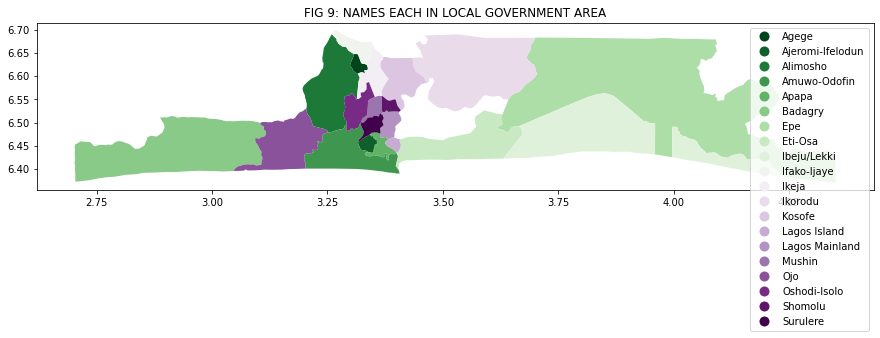

In [ ]:
ax = mp.plot(column='lgas', cmap =    
                                'PRGn_r', figsize=(15,9),   
                                  k=3, legend =  
                                  True);plt.title('FIG 9: NAMES EACH IN LOCAL GOVERNMENT AREA') # Maps were use to represent each local ggovernment area based on facilitiy name

'# Maps were use to represent each local ggovernment area based on it land size '

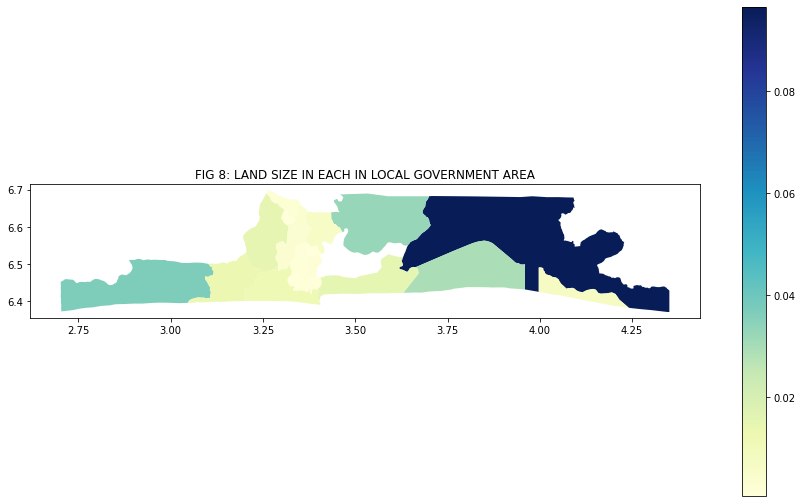

In [ ]:
ax = dfb.plot(column='Shape_Area', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                  k=3, legend =  
                                  True);plt.title('FIG 8: LAND SIZE IN EACH IN LOCAL GOVERNMENT AREA')
; # Maps were use to represent each local ggovernment area based on it land size 

Text(0.5, 1.0, 'FIG 10: POPULATION IN EACH IN LOCAL GOVERNMENT AREA')

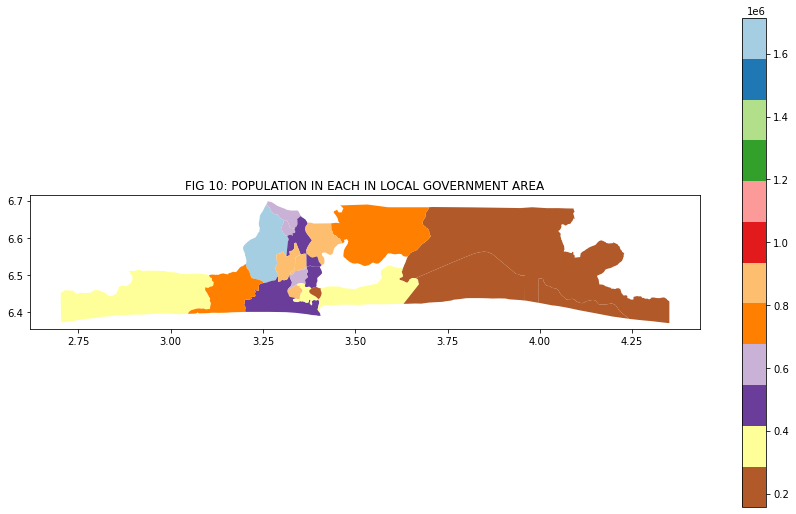

In [ ]:
ax = mp.plot(column='population', cmap =    
                                'Paired_r',label='Name',figsize=(15,9),   
                                  k=5, legend =  
                                  True);plt.title('FIG 10: POPULATION IN EACH IN LOCAL GOVERNMENT AREA') # Maps were use to represent each local ggovernment per population 

Text(0.5, 1.0, 'FIG 11: NUMBER PRIMARY HEALTH CENTERS IN EACH IN LOCAL GOVERNMENT AREA')

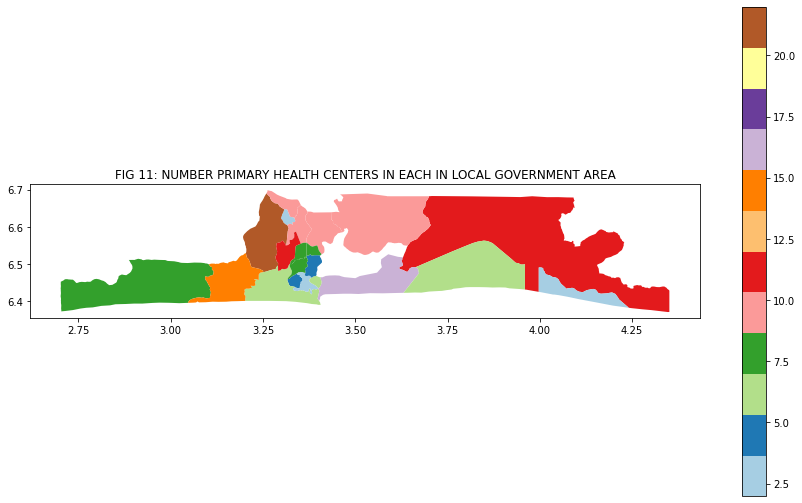

In [ ]:
ax = mp.plot(column='NO_PHC', cmap =    
                                'Paired', figsize=(15,9),   
                                  k=3, legend =  True);plt.title('FIG 11: NUMBER PRIMARY HEALTH CENTERS IN EACH IN LOCAL GOVERNMENT AREA')
                            # Maps were use to represent the number of primary health facilities in each local govenment.